In [38]:
import pandas as pd

In [39]:
from fastai.tabular.all import *

In [40]:
data = pd.read_csv("/content/SP902-Tabular-Capstone.csv")

In [41]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [74]:
data['Clicked on Ad']=data['Clicked on Ad'].astype(str)
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                object
dtype: object

In [75]:
dls = TabularDataLoaders.from_df(data,
                                 y_names='Clicked on Ad',
                                 cat_names=['Male', 'Country'],
                                cont_names=['Age','Daily Internet Usage', 'Daily Time Spent on Site','Area Income'],
                                procs=[Categorify, FillMissing, Normalize],
                                valid_pct=0.2)

In [86]:
precision = Precision()
recall = Recall()

In [87]:
learn = tabular_learner(dls, metrics =[error_rate, accuracy, precision, recall])

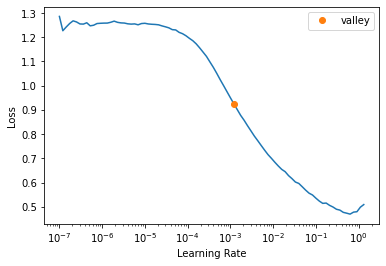

In [83]:
best_learning_rate = learn.lr_find()

In [84]:
learn.fine_tune(2, best_learning_rate[0])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.696738,0.558924,0.040000,0.960000,00:00


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.128175,0.320408,0.045000,0.955000,00:00
1,0.109565,0.181241,0.045000,0.955000,00:00


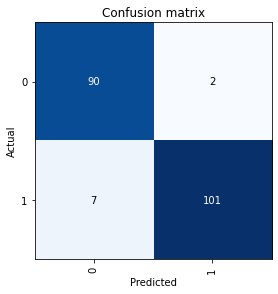

In [85]:
classif_interp = ClassificationInterpretation.from_learner(learn)
classif_interp.plot_confusion_matrix()

In [58]:
from sklearn.model_selection import train_test_split

In [62]:
X_cat = data[['Male', 'Country']]
X_num = data[['Age','Daily Internet Usage', 'Daily Time Spent on Site','Area Income']]

In [63]:
X_cat_dum = pd.get_dummies(X_cat)
X_cat_dum

,Male,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica (the territory South of 60 deg S),Country_Antigua and Barbuda,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X = pd.concat([X_num, X_cat_dum], axis=1)

In [65]:
y = data['Clicked on Ad']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
model.score(X_test, y_test)

0.895

In [70]:
from sklearn.metrics import classification_report

In [71]:
y_pred = model.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       191
           1       0.95      0.85      0.89       209

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.89       400
weighted avg       0.90      0.90      0.89       400

